In [44]:
import time
import tracemalloc
from functools import wraps
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import random as sparse_random
from scipy.sparse import csr_matrix
import cupy as cp
import tensorflow as tf


In [14]:
def profile(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        tracemalloc.start()
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        current, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        execution_time = end_time - start_time
        print(f"Function: {func.__name__}")
        print(f"Time taken: {execution_time:.4f} seconds")
        print(f"Current memory usage: {current / 10**6:.2f} MB")
        print(f"Peak memory usage: {peak / 10**6:.2f} MB")
        return result, execution_time, peak / 10**6
    return wrapper

In [21]:
def generate_sparse_matrix(size, sparsity):
    # Create an n*n matrix filled with zeros
    matrix = np.zeros((size, size))
    
    # Calculate the number of non-zero elements based on the sparsity
    non_zero_elements = int((1 - sparsity) * size * size)
    
    # Randomly assign non-zero values at random positions in the matrix
    for _ in range(non_zero_elements):
        row = np.random.randint(0, size)
        col = np.random.randint(0, size)
        value = np.random.random()  # Generate a random non-zero value
        matrix[row, col] = value
    
    return matrix
    

# rows, cols = 1000, 1000
# sparsity = 0.99

# sparse_matrix = generate_sparse_matrix(rows, cols, sparsity)

# print(f"Matrix shape: {sparse_matrix.shape}")
# print(f"Number of non-zero elements: {sparse_matrix.nnz}")
# print(f"Actual sparsity: {1 - (sparse_matrix.nnz / (rows * cols)):.4f}")

In [39]:
matrix_size = [10, 25, 50, 75, 100, 250, 500, 750, 1000]


final_result = {
    'nested_loop_dense': {
        'mat_mul_time': [],
        'size': [],
        'total_function_time': [],
        'peak_memory_usage': []
    },
    '@_operator_dense': {
        'mat_mul_time': [],
        'size': [],
        'total_function_time': [],
        'peak_memory_usage': []
    },
    'numpy_dot_dense': {
        'mat_mul_time': [],
        'size': [],
        'total_function_time': [],
        'peak_memory_usage': []
    },
    'cupy_dense': {
        'mat_mul_time': [],
        'size': [],
        'total_function_time': [],
        'peak_memory_usage': []
    },
    'tf_cpu_dense':{
        'mat_mul_time': [],
        'size': [],
        'total_function_time': [],
        'peak_memory_usage': []
    },
    'tf_gpu_dense':{
        'mat_mul_time': [],
        'size': [],
        'total_function_time': [],
        'peak_memory_usage': []
    },
    'parallel_processing_cpu_dense':{
        'mat_mul_time': [],
        'size': [],
        'total_function_time': [],
        'peak_memory_usage': []
    },
    'parallel_processing_gpu_dense':{
        'mat_mul_time': [],
        'size': [],
        'total_function_time': [],
        'peak_memory_usage': []
    },
    'col_mat_dense':{
        'mat_mul_time': [],
        'size': [],
        'total_function_time': [],
        'peak_memory_usage': []
    },

    'nested_loop_sparse': {
        'mat_mul_time': [],
        'size': [],
        'total_function_time': [],
        'peak_memory_usage': []
    },
    '@_operator_sparse': {
        'mat_mul_time': [],
        'size': [],
        'total_function_time': [],
        'peak_memory_usage': []
    },
    'numpy_dot_sparse': {
        'mat_mul_time': [],
        'size': [],
        'total_function_time': [],
        'peak_memory_usage': []
    },
    'cupy_sparse': {
        'mat_mul_time': [],
        'size': [],
        'total_function_time': [],
        'peak_memory_usage': []
    },
    'tf_cpu_sparse':{
        'mat_mul_time': [],
        'size': [],
        'total_function_time': [],
        'peak_memory_usage': []
    },
    'tf_gpu_sparse':{
        'mat_mul_time': [],
        'size': [],
        'total_function_time': [],
        'peak_memory_usage': []
    },
    'parallel_processing_cpu_sparse':{
        'mat_mul_time': [],
        'size': [],
        'total_function_time': [],
        'peak_memory_usage': []
    },
    'parallel_processing_gpu_sparse':{
        'mat_mul_time': [],
        'size': [],
        'total_function_time': [],
        'peak_memory_usage': []
    },
    'col_mat_sparse':{
        'mat_mul_time': [],
        'size': [],
        'total_function_time': [],
        'peak_memory_usage': []
    }
}

In [24]:
def plot_results(final_result, title):
    sizes = final_result['size']
    mat_mul_time = final_result['mat_mul_time']
    total_function_time = final_result['total_function_time']
    peak_memory_usage = final_result['peak_memory_usage']

    plt.figure(figsize=(10, 6))

    plt.plot(sizes, mat_mul_time, marker='o', label='Matrix Multiplication Time (s)')
    plt.plot(sizes, total_function_time, marker='o', label='Total Function Time (s)', color='g')
    plt.plot(sizes, peak_memory_usage, marker='o', label='Peak Memory Usage (MB)', color='r')

    plt.xlabel('Matrix Size')
    plt.ylabel('Value')
    plt.title(f'{title}')
    plt.grid(True)
    plt.legend()
    plt.show()


def plot_all_results():
    pass

def gif_results():
    pass

Process time: 0.0020 seconds
Function: nested_loop
Time taken: 0.0029 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.00 MB
#######################
Process time: 0.0025 seconds
Function: nested_loop
Time taken: 0.0029 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.00 MB
#######################
Process time: 0.0421 seconds
Function: nested_loop
Time taken: 0.0422 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.01 MB
#######################
Process time: 0.0431 seconds
Function: nested_loop
Time taken: 0.0434 seconds
Current memory usage: 0.15 MB
Peak memory usage: 0.16 MB
#######################
Process time: 0.3683 seconds
Function: nested_loop
Time taken: 0.3685 seconds
Current memory usage: 0.15 MB
Peak memory usage: 0.17 MB
#######################
Process time: 0.3530 seconds
Function: nested_loop
Time taken: 0.3525 seconds
Current memory usage: 0.15 MB
Peak memory usage: 0.17 MB
#######################
Process time: 1.1749 seconds
Function: nested_

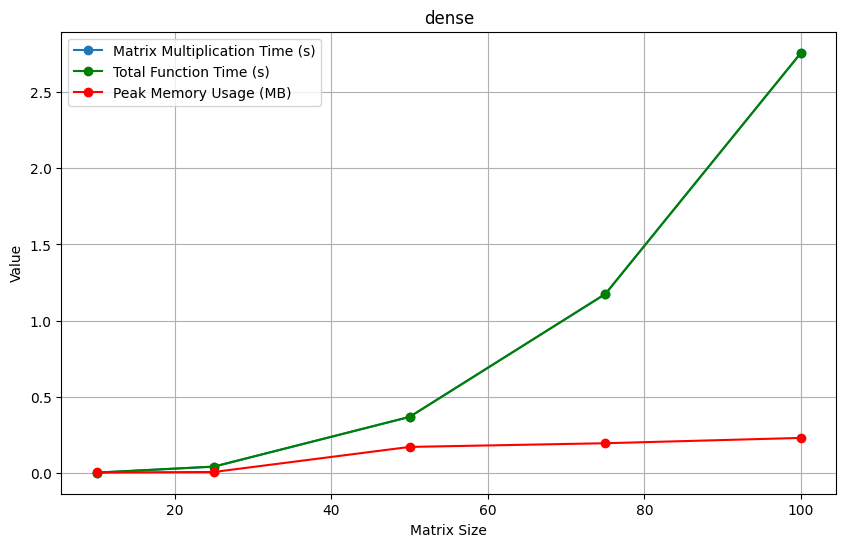

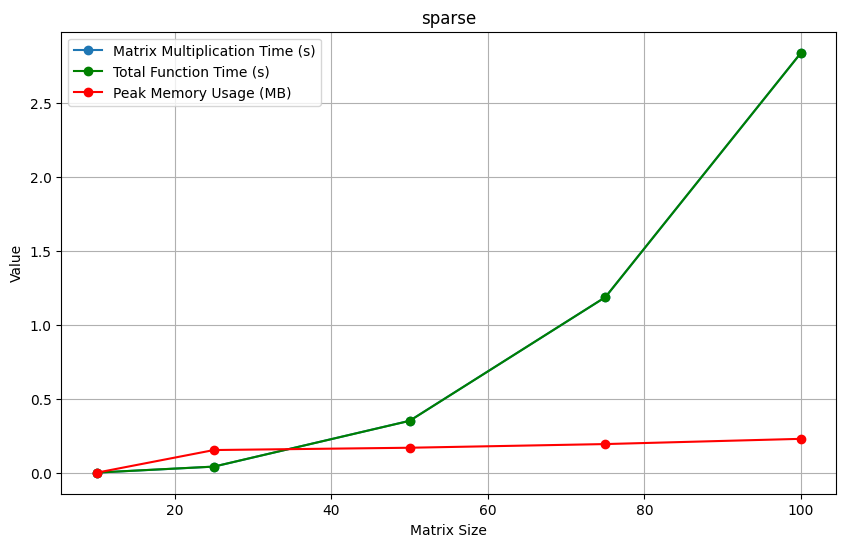

In [28]:
result_key_dense = 'nested_loop_dense'
result_key_sparse = 'nested_loop_sparse'

@profile
def nested_loop(a, b):
    n = len(a)
    result = np.zeros((n, n))
    start_process_time = time.time()
    for i in range(n):
        for j in range(n):
            for k in range(n):
                result[i][j] += a[i][k] * b[k][j]
    end_process_time = time.time()
    process_time = end_process_time - start_process_time
    print(f"Process time: {process_time:.4f} seconds")
    return process_time

final_result[result_key_dense] = {
    'mat_mul_time': [],
    'size': [],
    'total_function_time': [],
    'peak_memory_usage': []
}
final_result[result_key_sparse] = {
    'mat_mul_time': [],
    'size': [],
    'total_function_time': [],
    'peak_memory_usage': []
}

for size in matrix_size:
    a = np.random.rand(size, size)
    b = np.random.rand(size, size)
    mat_mul_time, total_function_time, peak_memory_usage = nested_loop(a, b)
    final_result[result_key_dense]['mat_mul_time'].append(mat_mul_time)
    final_result[result_key_dense]['size'].append(size)
    final_result[result_key_dense]['total_function_time'].append(total_function_time)
    final_result[result_key_dense]['peak_memory_usage'].append(peak_memory_usage)
    print("#######################")
    a_sparse = generate_sparse_matrix(size, 0.99)
    b_sparse = generate_sparse_matrix(size, 0.99)
    mat_mul_time, total_function_time, peak_memory_usage = nested_loop(a_sparse, b_sparse)
    final_result[result_key_sparse]['mat_mul_time'].append(mat_mul_time)
    final_result[result_key_sparse]['size'].append(size)
    final_result[result_key_sparse]['total_function_time'].append(total_function_time)
    final_result[result_key_sparse]['peak_memory_usage'].append(peak_memory_usage)
    print("#######################")


plot_results(final_result[result_key_dense], 'dense')
plot_results(final_result[result_key_sparse], 'sparse')


Process time: 0.0000 seconds
Function: nested_loop
Time taken: 0.0001 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.00 MB
#######################
Process time: 0.0000 seconds
Function: nested_loop
Time taken: 0.0000 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.00 MB
#######################
Process time: 0.0000 seconds
Function: nested_loop
Time taken: 0.0004 seconds
Current memory usage: 0.15 MB
Peak memory usage: 0.15 MB
#######################
Process time: 0.0000 seconds
Function: nested_loop
Time taken: 0.0000 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.01 MB
#######################
Process time: 0.0000 seconds
Function: nested_loop
Time taken: 0.0000 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.02 MB
#######################
Process time: 0.0000 seconds
Function: nested_loop
Time taken: 0.0000 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.02 MB
#######################
Process time: 0.0000 seconds
Function: nested_

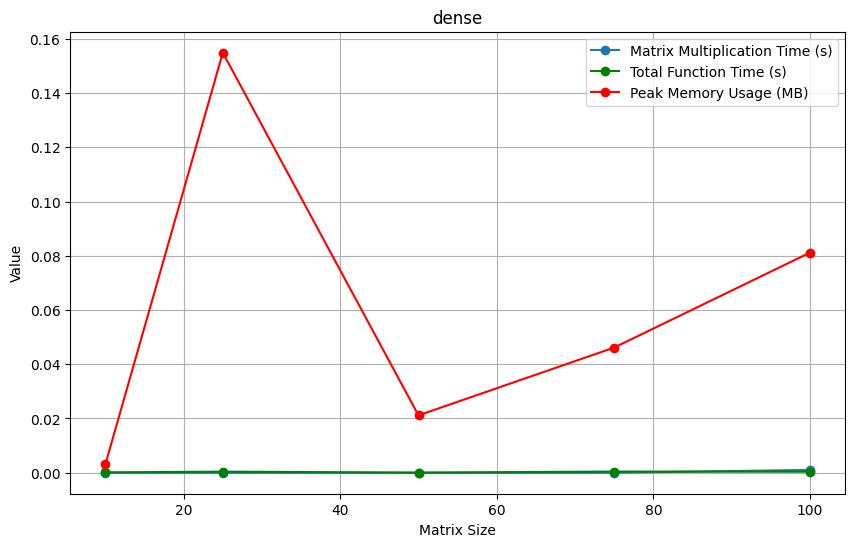

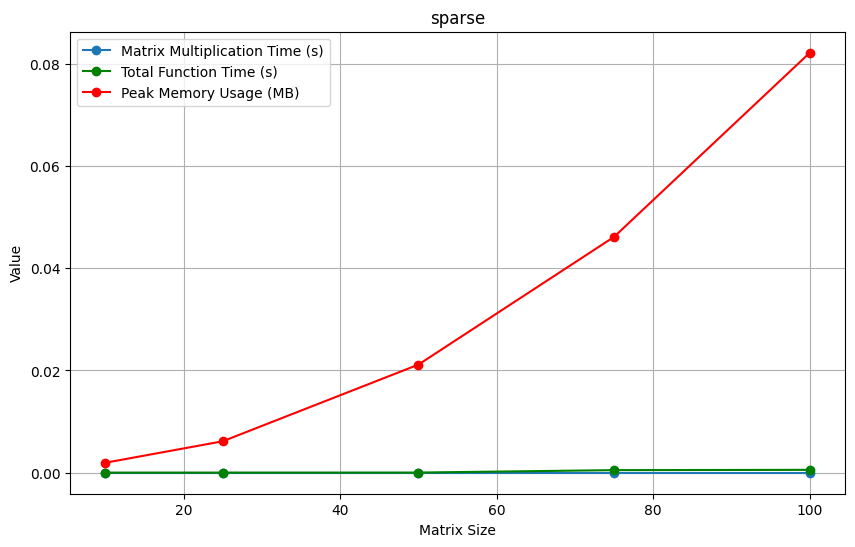

In [31]:
result_key_dense = '@_operator_dense'
result_key_sparse = '@_operator_sparse'

@profile
def mat_Operator(a, b):
    start_process_time = time.time()
    result = a @ b
    end_process_time = time.time()
    process_time = end_process_time - start_process_time
    print(f"Process time: {process_time:.4f} seconds")
    return process_time

final_result[result_key_dense] = {
    'mat_mul_time': [],
    'size': [],
    'total_function_time': [],
    'peak_memory_usage': []
}
final_result[result_key_sparse] = {
    'mat_mul_time': [],
    'size': [],
    'total_function_time': [],
    'peak_memory_usage': []
}

for size in matrix_size:
    a = np.random.rand(size, size)
    b = np.random.rand(size, size)
    mat_mul_time, total_function_time, peak_memory_usage = mat_Operator(a, b)
    final_result[result_key_dense]['mat_mul_time'].append(mat_mul_time)
    final_result[result_key_dense]['size'].append(size)
    final_result[result_key_dense]['total_function_time'].append(total_function_time)
    final_result[result_key_dense]['peak_memory_usage'].append(peak_memory_usage)
    print("#######################")
    a_sparse = generate_sparse_matrix(size, 0.99)
    b_sparse = generate_sparse_matrix(size, 0.99)
    mat_mul_time, total_function_time, peak_memory_usage = mat_Operator(a_sparse, b_sparse)
    final_result[result_key_sparse]['mat_mul_time'].append(mat_mul_time)
    final_result[result_key_sparse]['size'].append(size)
    final_result[result_key_sparse]['total_function_time'].append(total_function_time)
    final_result[result_key_sparse]['peak_memory_usage'].append(peak_memory_usage)
    print("#######################")


plot_results(final_result[result_key_dense], 'dense')
plot_results(final_result[result_key_sparse], 'sparse')


Process time: 0.0000 seconds
Function: nested_loop
Time taken: 0.0002 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.00 MB
#######################
Process time: 0.0000 seconds
Function: nested_loop
Time taken: 0.0000 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.00 MB
#######################
Process time: 0.0000 seconds
Function: nested_loop
Time taken: 0.0000 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.01 MB
#######################
Process time: 0.0000 seconds
Function: nested_loop
Time taken: 0.0000 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.01 MB
#######################
Process time: 0.0000 seconds
Function: nested_loop
Time taken: 0.0000 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.02 MB
#######################
Process time: 0.0000 seconds
Function: nested_loop
Time taken: 0.0000 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.02 MB
#######################
Process time: 0.0010 seconds
Function: nested_

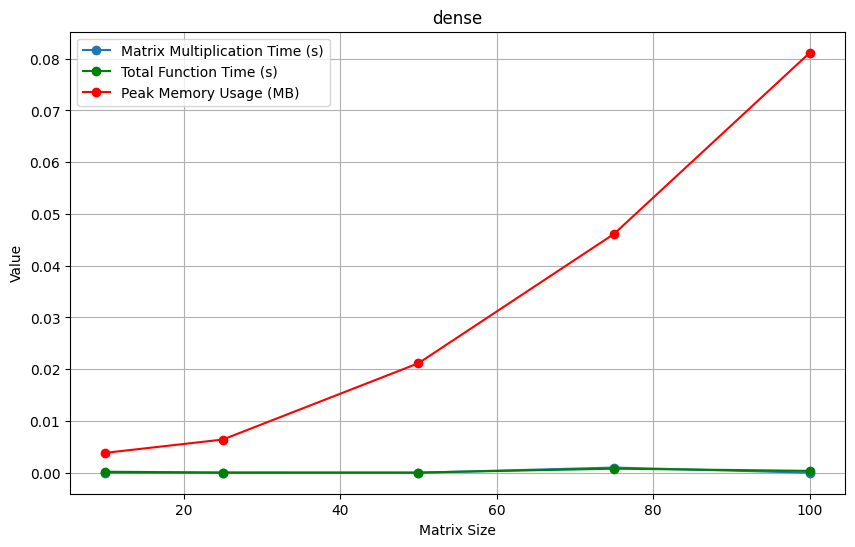

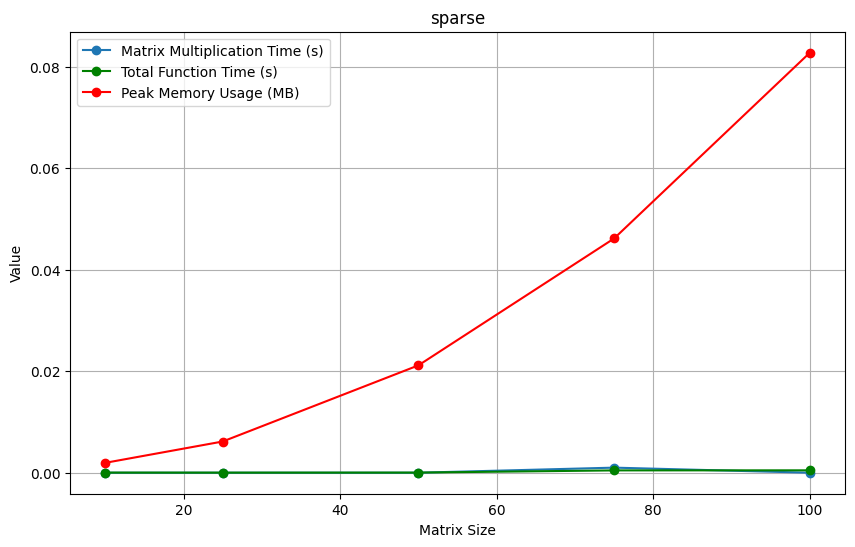

In [33]:
result_key_dense = 'numpy_dot_dense'
result_key_sparse = 'numpy_dot_sparse'

@profile
def numpy_dot(a, b):
    start_process_time = time.time()
    result = np.dot(a, b)
    end_process_time = time.time()
    process_time = end_process_time - start_process_time
    print(f"Process time: {process_time:.4f} seconds")
    return process_time

final_result[result_key_dense] = {
    'mat_mul_time': [],
    'size': [],
    'total_function_time': [],
    'peak_memory_usage': []
}
final_result[result_key_sparse] = {
    'mat_mul_time': [],
    'size': [],
    'total_function_time': [],
    'peak_memory_usage': []
}

for size in matrix_size:
    a = np.random.rand(size, size)
    b = np.random.rand(size, size)
    mat_mul_time, total_function_time, peak_memory_usage = numpy_dot(a, b)
    final_result[result_key_dense]['mat_mul_time'].append(mat_mul_time)
    final_result[result_key_dense]['size'].append(size)
    final_result[result_key_dense]['total_function_time'].append(total_function_time)
    final_result[result_key_dense]['peak_memory_usage'].append(peak_memory_usage)
    print("#######################")
    a_sparse = generate_sparse_matrix(size, 0.99)
    b_sparse = generate_sparse_matrix(size, 0.99)
    mat_mul_time, total_function_time, peak_memory_usage = numpy_dot(a_sparse, b_sparse)
    final_result[result_key_sparse]['mat_mul_time'].append(mat_mul_time)
    final_result[result_key_sparse]['size'].append(size)
    final_result[result_key_sparse]['total_function_time'].append(total_function_time)
    final_result[result_key_sparse]['peak_memory_usage'].append(peak_memory_usage)
    print("#######################")


plot_results(final_result[result_key_dense], 'dense')
plot_results(final_result[result_key_sparse], 'sparse')


Process time: 0.0000 seconds
Function: cupy_dot
Time taken: 0.0002 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.00 MB
#######################
Process time: 0.0000 seconds
Function: cupy_dot
Time taken: 0.0000 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.00 MB
#######################
Process time: 0.0000 seconds
Function: cupy_dot
Time taken: 0.0002 seconds
Current memory usage: 0.15 MB
Peak memory usage: 0.15 MB
#######################
Process time: 0.0000 seconds
Function: cupy_dot
Time taken: 0.0000 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.01 MB
#######################
Process time: 0.0000 seconds
Function: cupy_dot
Time taken: 0.0001 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.02 MB
#######################
Process time: 0.0000 seconds
Function: cupy_dot
Time taken: 0.0000 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.02 MB
#######################
Process time: 0.0010 seconds
Function: cupy_dot
Time taken: 0.00

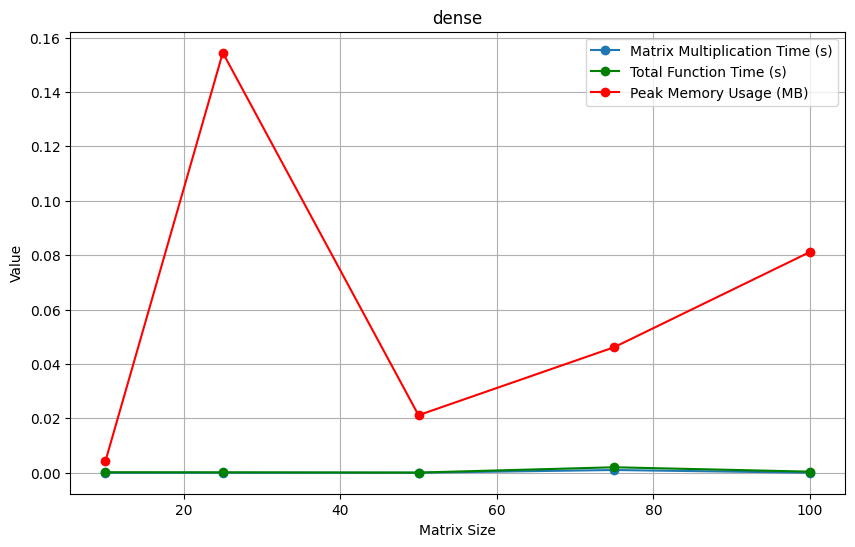

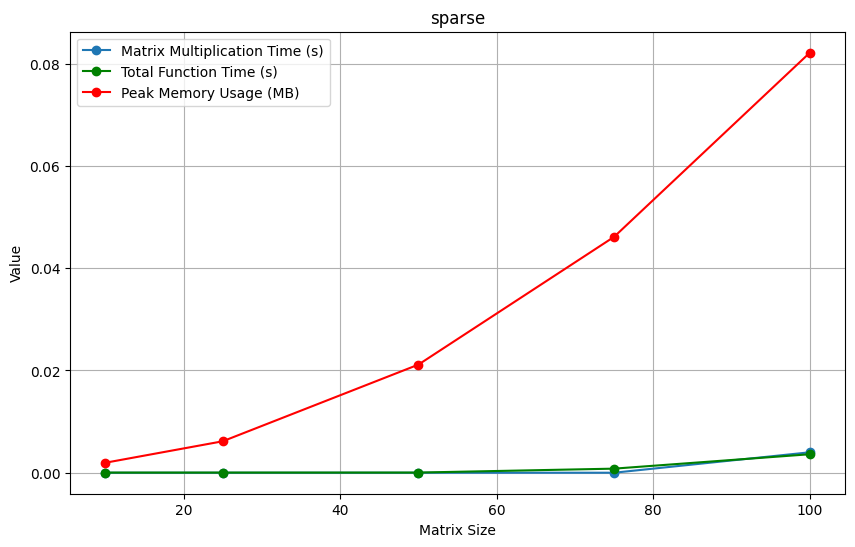

In [38]:
result_key_dense = 'cupy_dense'
result_key_sparse = 'cupy_sparse'

@profile
def cupy_dot(a, b):
    start_process_time = time.time()
    result = cp.dot(a, b)
    end_process_time = time.time()
    process_time = end_process_time - start_process_time
    print(f"Process time: {process_time:.4f} seconds")
    return process_time

final_result[result_key_dense] = {
    'mat_mul_time': [],
    'size': [],
    'total_function_time': [],
    'peak_memory_usage': []
}
final_result[result_key_sparse] = {
    'mat_mul_time': [],
    'size': [],
    'total_function_time': [],
    'peak_memory_usage': []
}

for size in matrix_size:
    a = np.random.rand(size, size)
    b = np.random.rand(size, size)
    mat_mul_time, total_function_time, peak_memory_usage = cupy_dot(a, b)
    final_result[result_key_dense]['mat_mul_time'].append(mat_mul_time)
    final_result[result_key_dense]['size'].append(size)
    final_result[result_key_dense]['total_function_time'].append(total_function_time)
    final_result[result_key_dense]['peak_memory_usage'].append(peak_memory_usage)
    print("#######################")
    a_sparse = generate_sparse_matrix(size, 0.99)
    b_sparse = generate_sparse_matrix(size, 0.99)
    mat_mul_time, total_function_time, peak_memory_usage = cupy_dot(a_sparse, b_sparse)
    final_result[result_key_sparse]['mat_mul_time'].append(mat_mul_time)
    final_result[result_key_sparse]['size'].append(size)
    final_result[result_key_sparse]['total_function_time'].append(total_function_time)
    final_result[result_key_sparse]['peak_memory_usage'].append(peak_memory_usage)
    print("#######################")


plot_results(final_result[result_key_dense], 'dense')
plot_results(final_result[result_key_sparse], 'sparse')


Process time: 0.0010 seconds
Function: col_mat
Time taken: 0.0014 seconds
Current memory usage: 0.15 MB
Peak memory usage: 0.15 MB
#######################
Process time: 0.0010 seconds
Function: col_mat
Time taken: 0.0008 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.00 MB
#######################
Process time: 0.0030 seconds
Function: col_mat
Time taken: 0.0033 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.01 MB
#######################
Process time: 0.0035 seconds
Function: col_mat
Time taken: 0.0030 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.01 MB
#######################
Process time: 0.0115 seconds
Function: col_mat
Time taken: 0.0113 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.02 MB
#######################
Process time: 0.0105 seconds
Function: col_mat
Time taken: 0.0110 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.02 MB
#######################
Process time: 0.0241 seconds
Function: col_mat
Time taken: 0.0240 seco

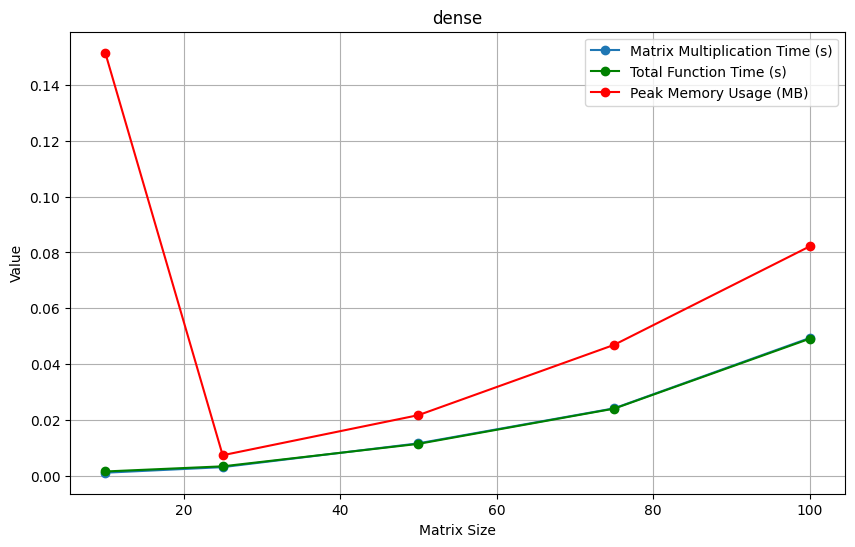

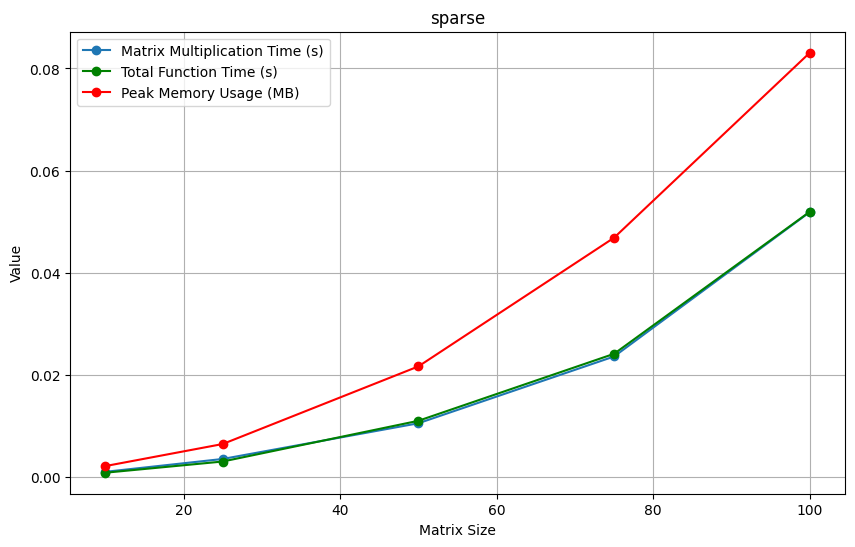

In [43]:
result_key_dense = 'col_mat_dense'
result_key_sparse = 'col_mat_sparse'

@profile
def col_mat(a, b):
    C = np.zeros((a.shape[0], b.shape[1]))
    start_process_time = time.time()
    for columns_in_B in range(b.shape[1]):
        col_output = np.zeros(a.shape[0])
        for columns_in_A in range(a.shape[1]):
            col_output += np.dot(a[:, columns_in_A], b[columns_in_A, columns_in_B])
        C[:, columns_in_B] = col_output
    end_process_time = time.time()
    process_time = end_process_time - start_process_time
    print(f"Process time: {process_time:.4f} seconds")
    return process_time

final_result[result_key_dense] = {
    'mat_mul_time': [],
    'size': [],
    'total_function_time': [],
    'peak_memory_usage': []
}
final_result[result_key_sparse] = {
    'mat_mul_time': [],
    'size': [],
    'total_function_time': [],
    'peak_memory_usage': []
}

for size in matrix_size:
    a = np.random.rand(size, size)
    b = np.random.rand(size, size)
    # convert a and b into tensor
    mat_mul_time, total_function_time, peak_memory_usage = col_mat(a, b)
    final_result[result_key_dense]['mat_mul_time'].append(mat_mul_time)
    final_result[result_key_dense]['size'].append(size)
    final_result[result_key_dense]['total_function_time'].append(total_function_time)
    final_result[result_key_dense]['peak_memory_usage'].append(peak_memory_usage)
    print("#######################")
    a_sparse = generate_sparse_matrix(size, 0.99)
    b_sparse = generate_sparse_matrix(size, 0.99)
    # convert a_sparse and b_sparse into tensor
    mat_mul_time, total_function_time, peak_memory_usage = col_mat(a_sparse, b_sparse)
    final_result[result_key_sparse]['mat_mul_time'].append(mat_mul_time)
    final_result[result_key_sparse]['size'].append(size)
    final_result[result_key_sparse]['total_function_time'].append(total_function_time)
    final_result[result_key_sparse]['peak_memory_usage'].append(peak_memory_usage)
    print("#######################")


plot_results(final_result[result_key_dense], 'dense')
plot_results(final_result[result_key_sparse], 'sparse')


Process time: 0.0010 seconds
Function: tf_cpu
Time taken: 0.0005 seconds
Current memory usage: 0.15 MB
Peak memory usage: 0.15 MB
#######################
Process time: 0.0000 seconds
Function: tf_cpu
Time taken: 0.0002 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.00 MB
#######################
Process time: 0.0010 seconds
Function: tf_cpu
Time taken: 0.0006 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.00 MB
#######################
Process time: 0.0000 seconds
Function: tf_cpu
Time taken: 0.0002 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.00 MB
#######################
Process time: 0.0010 seconds
Function: tf_cpu
Time taken: 0.0005 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.00 MB
#######################
Process time: 0.0000 seconds
Function: tf_cpu
Time taken: 0.0002 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.00 MB
#######################
Process time: 0.0010 seconds
Function: tf_cpu
Time taken: 0.0005 seconds
Cur

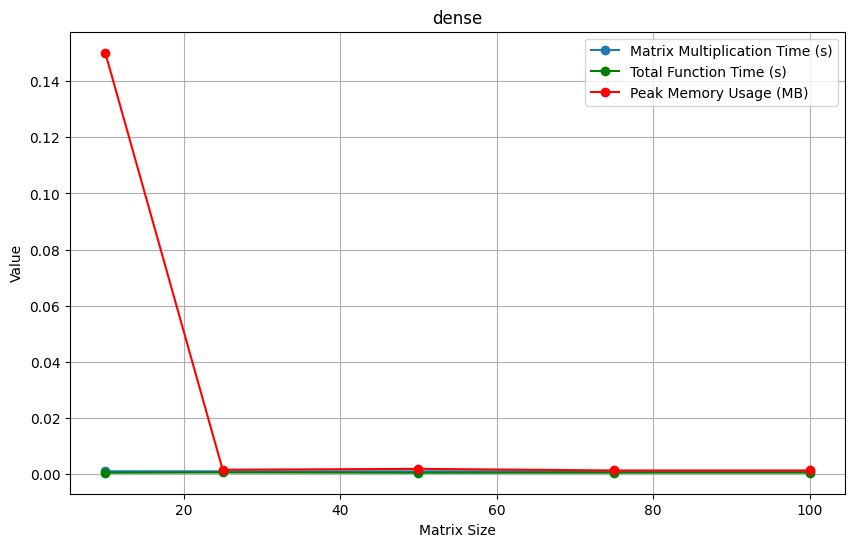

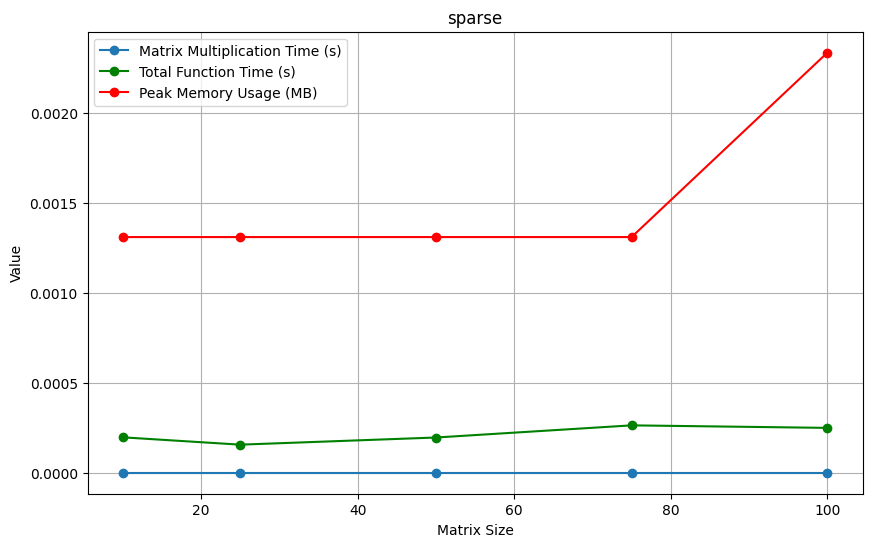

In [50]:
result_key_dense = 'tf_cpu_dense'
result_key_sparse = 'tf_cpu_sparse'

@profile
def tf_cpu(a, b):
    start_process_time = time.time()
    with tf.device('/CPU:0'):
        result = tf.matmul(a_tf, b_tf)
    end_process_time = time.time()
    process_time = end_process_time - start_process_time
    print(f"Process time: {process_time:.4f} seconds")
    return process_time

final_result[result_key_dense] = {
    'mat_mul_time': [],
    'size': [],
    'total_function_time': [],
    'peak_memory_usage': []
}
final_result[result_key_sparse] = {
    'mat_mul_time': [],
    'size': [],
    'total_function_time': [],
    'peak_memory_usage': []
}

for size in matrix_size:
    a = np.random.rand(size, size)
    b = np.random.rand(size, size)
    a_tf = tf.convert_to_tensor(a)
    b_tf = tf.convert_to_tensor(b)
    mat_mul_time, total_function_time, peak_memory_usage = tf_cpu(a_tf, b_tf)
    final_result[result_key_dense]['mat_mul_time'].append(mat_mul_time)
    final_result[result_key_dense]['size'].append(size)
    final_result[result_key_dense]['total_function_time'].append(total_function_time)
    final_result[result_key_dense]['peak_memory_usage'].append(peak_memory_usage)
    print("#######################")
    a_sparse = generate_sparse_matrix(size, 0.99)
    b_sparse = generate_sparse_matrix(size, 0.99)
    a_sparse_tf = tf.convert_to_tensor(a_sparse)
    b_sparse_tf = tf.convert_to_tensor(b_sparse)
    mat_mul_time, total_function_time, peak_memory_usage = tf_cpu(a_sparse_tf, b_sparse_tf)
    final_result[result_key_sparse]['mat_mul_time'].append(mat_mul_time)
    final_result[result_key_sparse]['size'].append(size)
    final_result[result_key_sparse]['total_function_time'].append(total_function_time)
    final_result[result_key_sparse]['peak_memory_usage'].append(peak_memory_usage)
    print("#######################")


plot_results(final_result[result_key_dense], 'dense')
plot_results(final_result[result_key_sparse], 'sparse')


Process time: 0.0000 seconds
Function: tf_gpu
Time taken: 0.0005 seconds
Current memory usage: 0.15 MB
Peak memory usage: 0.15 MB
#######################
Process time: 0.0000 seconds
Function: tf_gpu
Time taken: 0.0006 seconds
Current memory usage: 0.15 MB
Peak memory usage: 0.15 MB
#######################
Process time: 0.0000 seconds
Function: tf_gpu
Time taken: 0.0002 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.00 MB
#######################
Process time: 0.0000 seconds
Function: tf_gpu
Time taken: 0.0002 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.00 MB
#######################
Process time: 0.0000 seconds
Function: tf_gpu
Time taken: 0.0001 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.00 MB
#######################
Process time: 0.0015 seconds
Function: tf_gpu
Time taken: 0.0002 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.00 MB
#######################
Process time: 0.0000 seconds
Function: tf_gpu
Time taken: 0.0002 seconds
Cur

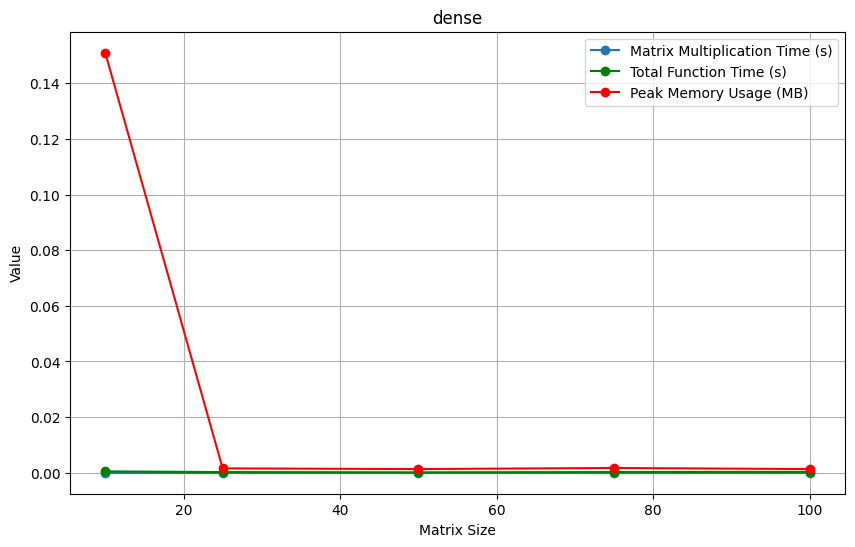

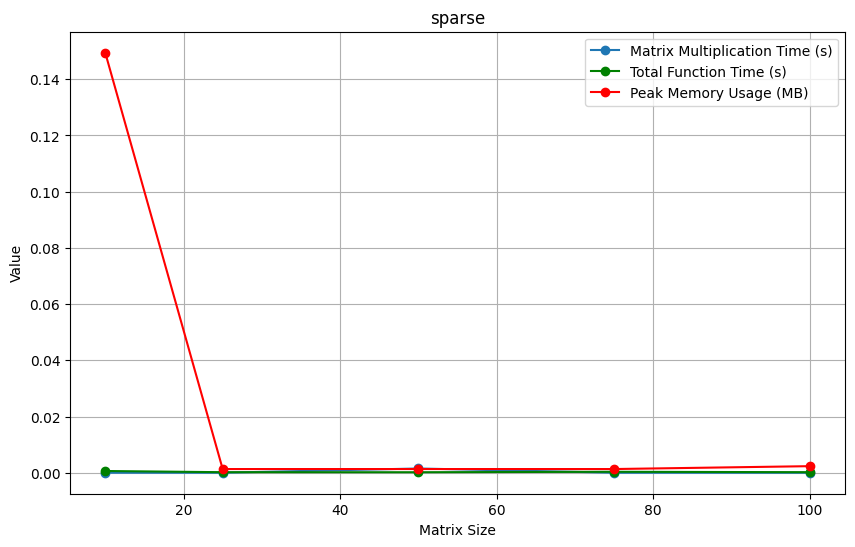

In [53]:
result_key_dense = 'tf_gpu_dense'
result_key_sparse = 'tf_gpu_sparse'

@profile
def tf_gpu(a, b):
    start_process_time = time.time()
    with tf.device('/GPU:0'):
        result = tf.matmul(a_tf, b_tf)
    end_process_time = time.time()
    process_time = end_process_time - start_process_time
    print(f"Process time: {process_time:.4f} seconds")
    return process_time

final_result[result_key_dense] = {
    'mat_mul_time': [],
    'size': [],
    'total_function_time': [],
    'peak_memory_usage': []
}
final_result[result_key_sparse] = {
    'mat_mul_time': [],
    'size': [],
    'total_function_time': [],
    'peak_memory_usage': []
}

for size in matrix_size:
    a = np.random.rand(size, size)
    b = np.random.rand(size, size)
    a_tf = tf.convert_to_tensor(a)
    b_tf = tf.convert_to_tensor(b)
    mat_mul_time, total_function_time, peak_memory_usage = tf_gpu(a_tf, b_tf)
    final_result[result_key_dense]['mat_mul_time'].append(mat_mul_time)
    final_result[result_key_dense]['size'].append(size)
    final_result[result_key_dense]['total_function_time'].append(total_function_time)
    final_result[result_key_dense]['peak_memory_usage'].append(peak_memory_usage)
    print("#######################")
    a_sparse = generate_sparse_matrix(size, 0.99)
    b_sparse = generate_sparse_matrix(size, 0.99)
    a_sparse_tf = tf.convert_to_tensor(a_sparse)
    b_sparse_tf = tf.convert_to_tensor(b_sparse)
    mat_mul_time, total_function_time, peak_memory_usage = tf_gpu(a_sparse_tf, b_sparse_tf)
    final_result[result_key_sparse]['mat_mul_time'].append(mat_mul_time)
    final_result[result_key_sparse]['size'].append(size)
    final_result[result_key_sparse]['total_function_time'].append(total_function_time)
    final_result[result_key_sparse]['peak_memory_usage'].append(peak_memory_usage)
    print("#######################")


plot_results(final_result[result_key_dense], 'dense')
plot_results(final_result[result_key_sparse], 'sparse')


In [ ]:
import json

with open('data.json', 'w') as json_file:
    json.dump(final_result, json_file, indent=4)